In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('data/附件1.csv',encoding='gbk')
data

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
0,DD201708167493663618499909784,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017/1/1 0:53,D,已出货未退款,已提现
1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017/1/1 1:33,A,已出货未退款,已提现
2,DD201708167493578526890939886,E43A6E078A06874,5.5,5.5,430g泰奇八宝粥,2017/1/1 8:45,E,已出货未退款,已提现
3,DD201708167493683507186615837,E43A6E078A04228,5.0,5.0,48g好丽友薯愿香烤原味,2017/1/1 9:05,C,已出货未退款,已提现
4,DD201708167493759548618252006,E43A6E078A04134,3.0,3.0,600ml可口可乐,2017/1/1 9:41,B,已出货未退款,已提现
...,...,...,...,...,...,...,...,...,...
70675,DD2017061303584375886B880F17C,E43A6E078A04228,2.0,2.0,香脆肠,2017/12/31 22:07,C,已出货未退款,已提现
70676,DD20170613035815879F3941D1762,E43A6E078A06874,2.5,2.5,怡宝纯净水,2017/12/31 22:09,E,已出货未退款,已提现
70677,DD20170613020607768E3940FA188,E43A6E078A04228,3.0,3.0,统一冰红茶,2017/12/31 22:39,C,已出货未退款,已提现
70678,DD2017060217303716A53CCD6B185,E43A6E078A07631,6.0,6.0,安慕希酸奶,2017/12/31 23:10,D,已出货未退款,已提现


In [2]:
#用python处理数据分析时出现以下错误
#time data None doesn’t match format specified
#经过CSDN各种搜索发现需要在to_datetime内添加errors='coerce’即可解决
data['支付时间']=pd.to_datetime(data['支付时间'],format='%Y/%m/%d',errors='coerce')
data['月']=data['支付时间'].dt.month
data_1=data.loc[data['月']==6]#6月份的所有数据
data_1

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,月
11315,DD201708167493190200943961687,E43A6E078A04228,4.5,4.5,250ml燕塘原味酸奶,2017-06-01 00:01:00,C,已出货未退款,已提现,6.0
11316,DD201708167493190206930007675,E43A6E078A04134,2.0,2.0,145ml旺仔牛奶盒装,2017-06-01 00:02:00,B,已出货未退款,已提现,6.0
11317,DD201708167493190368633848103,E43A6E078A04172,1.5,1.5,劲仔小鱼（卤香味）,2017-06-01 00:07:00,A,已出货未退款,已提现,6.0
11318,DD201708167493466235023422173,E43A6E078A04172,4.5,4.5,80g香飘飘椰果奶茶麦香味,2017-06-01 00:08:00,A,已出货未退款,已提现,6.0
11319,DD20170521150353225D2CC0CD748,E43A6E078A04172,3.0,3.0,伊利纯牛奶,2017-06-01 00:08:00,A,已出货未退款,已提现,6.0
...,...,...,...,...,...,...,...,...,...,...
20350,DD201708167493348440225550872,E43A6E078A04228,3.6,3.6,32g卫龙亲嘴烧,2017-06-30 23:56:00,C,已出货未退款,已提现,6.0
20351,DD2017072819251430B860DBA9B3C,E43A6E078A04228,4.0,4.0,营养快线,2017-06-30 23:56:00,C,已出货未退款,已提现,6.0
20352,DD20170429075431892B87A078743,E43A6E078A04228,2.5,2.5,芬达330ml,2017-06-30 23:57:00,C,已出货未退款,已提现,6.0
20353,DD2017072819412424343B3FD3E2F,E43A6E078A06874,3.0,3.0,伊利优酸乳,2017-06-30 23:57:00,E,已出货未退款,已提现,6.0


In [3]:
dalei=data_1['商品'].unique().tolist()#提取出商品总列表，方便之后进行分类
dalei

['250ml燕塘原味酸奶',
 '145ml旺仔牛奶盒装',
 '劲仔小鱼（卤香味）',
 '80g香飘飘椰果奶茶麦香味',
 '伊利纯牛奶',
 '250ml维他奶巧克力味',
 '600ml可口可乐',
 '东鹏特饮',
 '20g咪咪虾条马来西亚风味',
 '250ml维他原味豆奶',
 '王老吉（罐）',
 '统一绿茶',
 '250ml维他柠檬茶',
 '40g双汇玉米热狗肠',
 '阿萨姆奶茶',
 '雪碧（500ml）',
 '新麦潮北海道吐司',
 '20g马来西亚风味咪咪蟹味粒0219',
 '250ml维他椰子植物蛋白饮料',
 '600ml雪碧',
 '百事可乐500ml',
 '可口可乐（500ml）',
 '70g乐事薯片黄瓜味',
 '12g劲仔小鱼麻辣味',
 '40g卫龙点心面黑椒牛排味',
 '咪咪虾条马来西亚风味',
 '58g丽芝士纳宝帝奶酪威化饼干',
 '450ml美汁源果粒橙',
 '250ml红牛',
 '农夫果园',
 '68g好丽友巧克力派2枚',
 '55g奥利奥迷你杯夹心小饼干杯装原味',
 '32g卫龙亲嘴烧红烧牛肉味',
 '225g味之不规则饼干芝士味',
 '65g卫龙亲嘴豆皮',
 '怡宝纯净水',
 '银鹭八宝粥',
 '85g嘉士利果乐果香夹心饼干蓝莓味',
 '阿萨姆煎茶奶绿',
 '268ml雀巢咖啡丝滑拿铁',
 '康师傅拉面(袋)',
 '日式鱼果',
 '优益C活菌型乳酸菌饮品',
 '500ml统一阿萨姆奶茶',
 '205g伊利安慕希原味',
 '营养快线',
 '70g乖媳妇野山泡椒凤爪',
 '330ml伊利畅意乳酸菌原味',
 '40g上好佳日式鱼果',
 '148g富甲一方紫薯仔',
 '32g卫龙亲嘴烧',
 '80g马赛克香蕉片',
 '可口可乐330ml',
 '香豆干',
 '45g双汇泡面拍挡',
 '37.5g费列罗榛果威化巧克力3颗',
 '30g无穷农场盐_鸡蛋',
 '可口可乐330ml（罐）',
 '统一冰红茶',
 '维他奶',
 '手撕素肉排',
 '鸭翅',
 '430g泰奇八宝粥',
 '68g多力多玉米片爆香热辣味',
 '86g合味道海鲜风味',
 '100g*5瓶益力多',
 '维他奶（巧克力味）',
 '500ml加多宝',
 '无穷农场盐

In [4]:
datasum=[]
datasem=[]
for i in dalei:
    data_x=data_1[data_1['商品']==i]['实际金额'].sum()
    data_t=data_1[data_1['商品']==i]['商品'].size
    datasum.append(data_x)
    datasem.append(data_t)
task1_2 = pd.DataFrame({'商品':dalei,'总实际金额':datasum,'销售量':datasem})
task1_2.sort_values(by='销售量',ascending=False,inplace=True)
task1_2.head()

,商品,总实际金额,销售量
35,怡宝纯净水,1754.0,657
13,40g双汇玉米热狗肠,499.5,240
7,东鹏特饮,860.0,238
109,脉动,1018.5,235
12,250ml维他柠檬茶,808.0,225


任务2.1：
方法一：


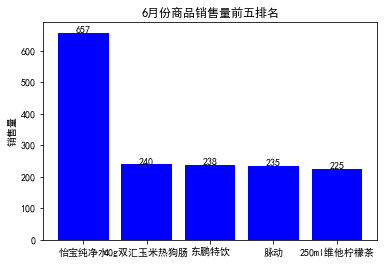

In [5]:
print('任务2.1：')
print('方法一：')
plt.rcParams['font.sans-serif']=['SimHei']
plt.bar(x=range(task1_2.head().shape[0]),  
       tick_label=task1_2.head()['商品'],
       height=task1_2.head()['销售量'],
       color='blue')
plt.ylabel('销售量')
plt.title('6月份商品销售量前五排名')
for x,y in enumerate(task1_2.head()['销售量']):
    plt.text(x,y+0.5,'%s'%round(y),ha='center')#将销售量显视于柱之上
plt.show()

方法二：


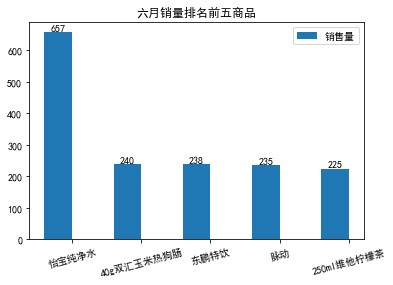

In [6]:
print('方法二：')
x=np.arange(len(task1_2.head()['商品']))
plt.bar(x-0.2,task1_2.head()['销售量'],width=0.4,label='销售量')
data3=task1_2.head()['销售量'].tolist()
data5=task1_2.head()['商品'].tolist()
for i in x :
    plt.text(i-0.2,data3[i],data3[i],va='bottom',ha='center')
plt.rcParams['font.sans-serif']=["SimHei"]
plt.rcParams['axes.unicode_minus']=False
plt.xticks(x,labels=data5,rotation=15)
plt.title('六月销量排名前五商品')
plt.legend()
plt.show()

No handles with labels found to put in legend.
<ipython-input-36-cd49e72d3e0e>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(121)
No handles with labels found to put in legend.
<ipython-input-36-cd49e72d3e0e>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122)
<ipython-input-36-cd49e72d3e0e>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuse

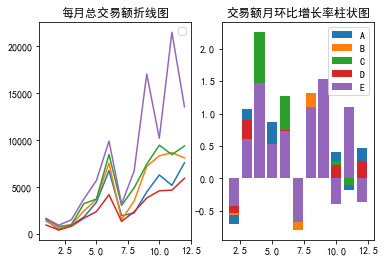

In [36]:
print('任务2.2：')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
def task22(file,level):
    datatask2 = pd.read_csv('data/'+file)
    if file=='task1-C.csv':
        datatask2=datatask2[datatask2['支付时间'].isin(['2017/2/29  3:44:00 PM'])]
    datatask2['支付时间'] = pd.to_datetime(datatask2['支付时间'], format='%Y/%m/%d',errors='coerce')
    datatask2['月'] = datatask2['支付时间'].dt.month
    sumtask2 = datatask2.groupby('月').sum('实际金额')
    month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    sumlist = sumtask2['实际金额'].tolist()
    disl = []
    for i in range(1, 12):
        dis = (sumlist[i] - sumlist[i - 1]) / sumlist[i - 1]
        disl.append(dis)
    plt.subplot(121)
    plt.plot(month, sumtask2['实际金额'])
    plt.legend()
    plt.title('每月总交易额折线图')
    plt.subplot(122)
    plt.bar(month[1:], disl,label=level)
    plt.title('交易额月环比增长率柱状图')
    plt.legend()
task22('task1-1A.csv','A')
task22('task1-1B.csv','B')
task22('task1-1C.csv','C')
task22('task1-1D.csv','D')
task22('task1-1E.csv','E')
plt.rcParams['font.sans-serif']=["SimHei"]
plt.rcParams['axes.unicode_minus']=False
plt.show()        

任务2.3：


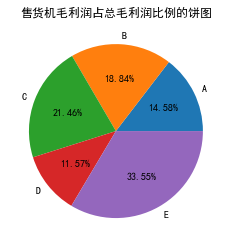

In [39]:
print('任务2.3：')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
datatask31=pd.read_csv('data/附件2.csv',encoding='gbk')
datatask32=datatask31['商品'].tolist()
drink=datatask31.groupby('大类').groups
dlist=drink['饮料'].tolist()
s_profit=[]
def task23(file):
    datatask23 = pd.read_csv('data/'+file)
    dsum = 0
    for i in dlist:
        ddrink = datatask23.loc[datatask23['商品'] == datatask32[i]]
        s = ddrink['实际金额'].sum()
        dsum += s
    sum1 = datatask23['实际金额'].sum()
    ndsum = sum1 - dsum
    profit = dsum * 0.25 + ndsum * 0.2
    s_profit.append(profit)
task23('task1-1A.csv')
task23('task1-1B.csv')
task23('task1-1C.csv')
task23('task1-1D.csv')
task23('task1-1E.csv')
plt.pie(s_profit,labels=['A','B','C','D','E'],autopct='%.2f%%')
plt.title('售货机毛利润占总毛利润比例的饼图')
plt.rcParams['font.sans-serif']=['SimHei']
plt.show()
 

In [2]:
print('任务2.4：')
#先拿到二级类目
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
data_all = pd.read_csv('data/fu_jian.csv',encoding='gbk')

data_all['支付时间']=pd.to_datetime(data_all['支付时间'],format='%Y/%m/%d',errors='coerce')#将日期时间转换为标准形式
data_all['月'] = data_all['支付时间'].dt.month
#每个二级类的销量
grouped = (data_all['实际金额'].groupby(data_all['二级类'])).sum()#通过groupby来分组操作 
print(grouped)

任务2.4：
二级类
乳制品         39886.3
其他            511.7
功能饮料        36796.4
咖啡           5922.5
坚果炒货          836.1
方便速食        19666.3
果冻/龟苓膏        367.0
果蔬饮料         9812.0
植物蛋白         8769.4
水           13913.5
海味零食         2521.1
碳酸饮料        20171.2
糖果/巧克力       1503.5
纸巾            674.2
肉干/豆制品/蛋    28633.3
膨化食品        13473.8
茶饮料         45740.5
蜜饯/果干       10150.4
饼干糕点        24353.5
香烟           3281.0
Name: 实际金额, dtype: float64


In [3]:
#获得每个月的销量
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sumtask2 = data_all.groupby('月').sum('实际金额')
sumlist = sumtask2['实际金额'].tolist()
print(sumlist)
#获得每个月的二级类的销量

[7137.000000000005, 3213.0, 5197.400000000001, 12896.399999999996, 18886.799999999985, 36864.299999999756, 11043.400000000001, 19773.999999999953, 40003.200000000004, 38908.999999999905, 48488.8000000001, 44570.39999999995]


ValueError: x and y must be the same size

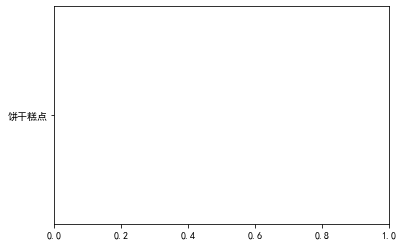

In [5]:
#s不会写
plt.scatter(x=month,y=data_all['二级类'],s=(sumtask2/2),color='black',label=month,alpha=0.6)

In [71]:
print('任务2.5：')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data_c=pd.read_csv('data/task1-1C.csv')
data_c.支付时间=pd.to_datetime(data_c.支付时间,format='%Y/%m/%d',errors='coerce')#将时间数据标准化
data_c['月']=data_c['支付时间'].dt.month#提取出月数据，并设立一列记录月数据，方便查询
data_c['日']=data_c['支付时间'].dt.day#同上
data_c['时']=data_c['支付时间'].dt.hour
data_c

任务2.5：


,Unnamed: 0,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现,月,日,时
0,3,DD201708167493683507186615837,E43A6E078A04228,5.0,5.0,48g好丽友薯愿香烤原味,2017-01-01 09:05:00,C,已出货未退款,已提现,1.0,1.0,9.0
1,6,DD201708167493663534589050871,E43A6E078A04228,7.0,7.0,330ml伊利畅意乳酸菌原味,2017-01-01 10:02:00,C,已出货未退款,已提现,1.0,1.0,10.0
2,7,DD201708167493663526093267894,E43A6E078A04228,8.0,8.0,160g盼盼手撕面包,2017-01-01 11:33:00,C,已出货未退款,已提现,1.0,1.0,11.0
3,9,DD20170810162914447BA58EF3127,E43A6E078A04228,2.0,2.0,鸭翅,2017-01-01 11:56:00,C,已出货未退款,已提现,1.0,1.0,11.0
4,11,DD2017081674930612078044876854,E43A6E078A04228,3.0,3.0,40g双汇玉米热狗肠,2017-01-01 12:55:00,C,已出货未退款,已提现,1.0,1.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14489,70668,DD2017060301065396C42B08B8FF4,E43A6E078A04228,4.0,4.0,脉动,2017-12-31 20:21:00,C,已出货未退款,已提现,12.0,31.0,20.0
14490,70672,DD20170613035911829B433478771,E43A6E078A04228,4.0,4.0,脉动,2017-12-31 21:43:00,C,已出货未退款,已提现,12.0,31.0,21.0
14491,70675,DD2017061303584375886B880F17C,E43A6E078A04228,2.0,2.0,香脆肠,2017-12-31 22:07:00,C,已出货未退款,已提现,12.0,31.0,22.0
14492,70677,DD20170613020607768E3940FA188,E43A6E078A04228,3.0,3.0,统一冰红茶,2017-12-31 22:39:00,C,已出货未退款,已提现,12.0,31.0,22.0


In [73]:
import numpy as np
data_six=data_c.loc[data_c['月']==6]
grouped=data_six.groupby(by=['日','时'])#将日与时进行分组
result=grouped.aggregate({'商品':np.size})#计算商品总数，并插入透视表中
Summary=result.pivot_table(index='时',columns='日',values='商品')
Summary

日,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
时,,,,,,,,,,,,,,,,,,,,,
0.0,6.0,2.0,2.0,NaN,1.0,5.0,NaN,1.0,1.0,NaN,...,1.0,2.0,NaN,3.0,1.0,1.0,1.0,1.0,NaN,4.0
1.0,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,1.0,...,NaN,3.0,3.0,3.0,NaN,2.0,1.0,NaN,1.0,NaN
2.0,1.0,1.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,...,2.0,NaN,1.0,1.0,1.0,NaN,1.0,2.0,1.0,1.0
3.0,NaN,1.0,3.0,NaN,3.0,NaN,NaN,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,5.0
4.0,2.0,NaN,NaN,NaN,NaN,5.0,1.0,NaN,1.0,NaN,...,NaN,NaN,2.0,1.0,2.0,2.0,1.0,2.0,2.0,8.0
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,5.0
7.0,6.0,2.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,2.0,...,2.0,4.0,3.0,1.0,1.0,NaN,4.0,1.0,1.0,5.0
8.0,4.0,2.0,2.0,2.0,4.0,5.0,4.0,4.0,2.0,NaN,...,2.0,4.0,NaN,1.0,4.0,NaN,1.0,2.0,4.0,8.0


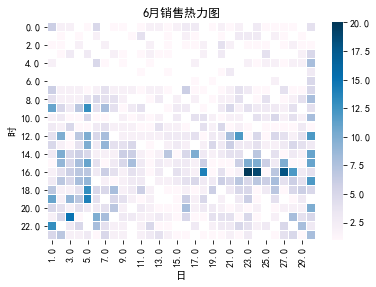

In [75]:
sns.heatmap(data=Summary,cmap='PuBu',linewidths=.1,annot=False,fmt='.1e')
plt.title('6月销售热力图')
plt.show()

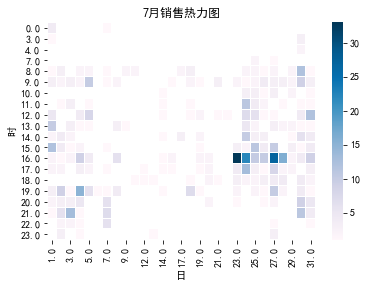

In [78]:
data_six=data_c.loc[data_c['月']==7]
grouped=data_six.groupby(by=['日','时'])#将日与时进行分组
result=grouped.aggregate({'商品':np.size})#计算商品总数，并插入透视表中
Summary=result.pivot_table(index='时',columns='日',values='商品')
sns.heatmap(data=Summary,cmap='PuBu',linewidths=.1,annot=False,fmt='.1e')
plt.title('7月销售热力图')
plt.show()

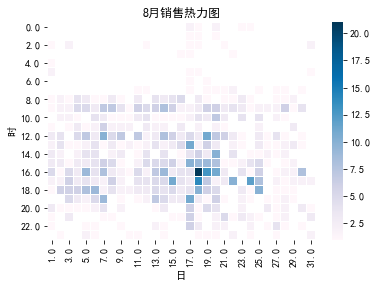

In [79]:
data_six=data_c.loc[data_c['月']==8]
grouped=data_six.groupby(by=['日','时'])#将日与时进行分组
result=grouped.aggregate({'商品':np.size})#计算商品总数，并插入透视表中
Summary=result.pivot_table(index='时',columns='日',values='商品')
sns.heatmap(data=Summary,cmap='PuBu',linewidths=.1,annot=False,fmt='.1e')
plt.title('8月销售热力图')
plt.show()